# HAMMING SKEMA BARU (stratified) entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                                                                                                                                  params  mean_test_score  rank_test_score
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.862381                1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.775604                2
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.664343                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9746    0.7931    0.8745   1122816
tidak kejang     0.8256    0.9793    0.8959   1122816

    accuracy                         0.8862   2245632
   macro avg     0.9001    0.8862    0.8852   2245632
weighted avg     0.9001    0.8862    0.8852   2245632



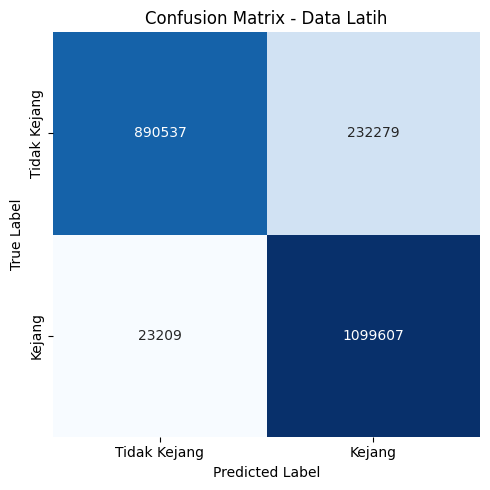

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9388    0.7762    0.8498    280704
tidak kejang     0.8093    0.9494    0.8737    280704

    accuracy                         0.8628    561408
   macro avg     0.8740    0.8628    0.8618    561408
weighted avg     0.8740    0.8628    0.8618    561408



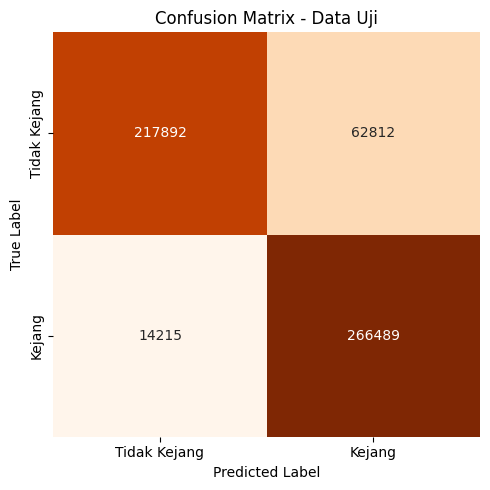

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# hanning (scema baru) stratify entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                                                                                                                                  params  mean_test_score  rank_test_score
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.866255                1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.790481                2
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.654052                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9721    0.8072    0.8820   1122816
tidak kejang     0.8352    0.9768    0.9005   1122816

    accuracy                         0.8920   2245632
   macro avg     0.9036    0.8920    0.8913   2245632
weighted avg     0.9036    0.8920    0.8913   2245632



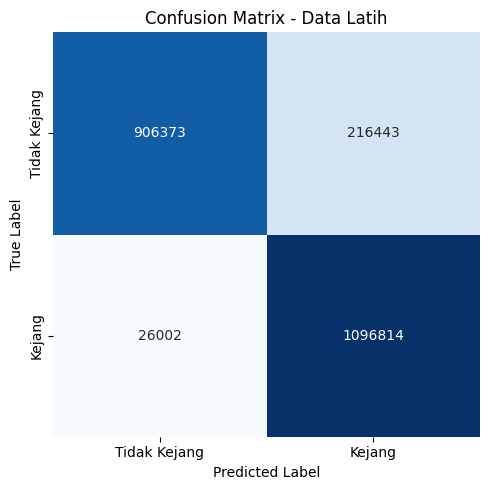

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9345    0.7893    0.8558    280704
tidak kejang     0.8176    0.9447    0.8766    280704

    accuracy                         0.8670    561408
   macro avg     0.8761    0.8670    0.8662    561408
weighted avg     0.8761    0.8670    0.8662    561408



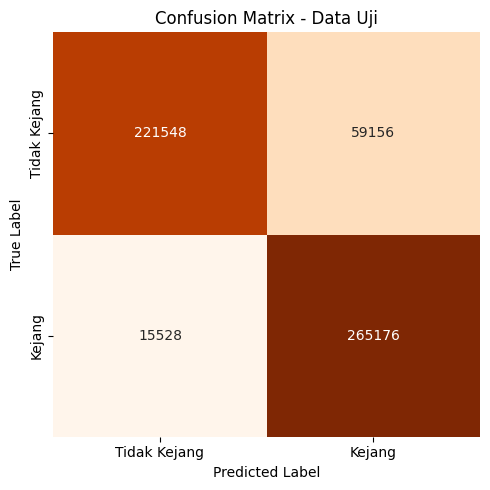

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# BLACKMAN SKEMA BARU (stratify) entropy/gini

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                                                                                                                                  params  mean_test_score  rank_test_score
   {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.858402                1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.854363                2


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (skema baru) stratify entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9711    0.7935    0.8734   1122816
tidak kejang     0.8255    0.9764    0.8946   1122816

    accuracy                         0.8850   2245632
   macro avg     0.8983    0.8850    0.8840   2245632
weighted avg     0.8983    0.8850    0.8840   2245632



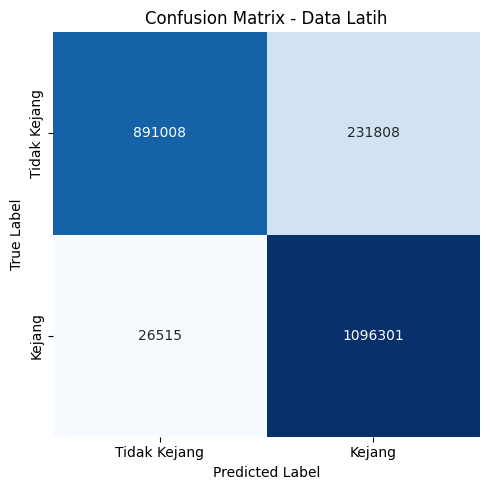

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9289    0.7704    0.8423    280704
tidak kejang     0.8039    0.9410    0.8671    280704

    accuracy                         0.8557    561408
   macro avg     0.8664    0.8557    0.8547    561408
weighted avg     0.8664    0.8557    0.8547    561408



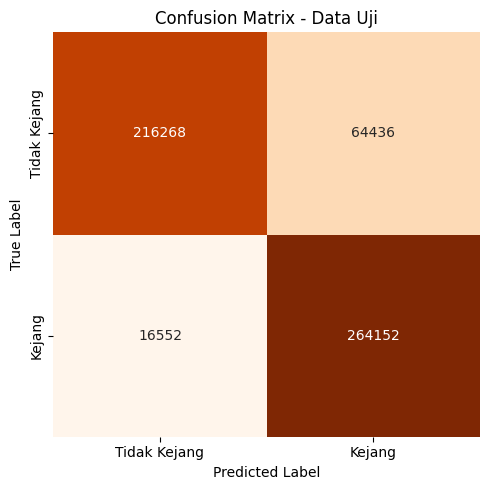

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                                                                                                                                  params  mean_test_score  rank_test_score
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.855373                1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.762702                2
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.661552                3


# BLACKMAN SKEMA BARU (stratify) entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                                                                                                                                  params  mean_test_score  rank_test_score
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.854363                1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.770976                2
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.686454                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9759    0.7730    0.8627   1122816
tidak kejang     0.8121    0.9809    0.8885   1122816

    accuracy                         0.8769   2245632
   macro avg     0.8940    0.8769    0.8756   2245632
weighted avg     0.8940    0.8769    0.8756   2245632



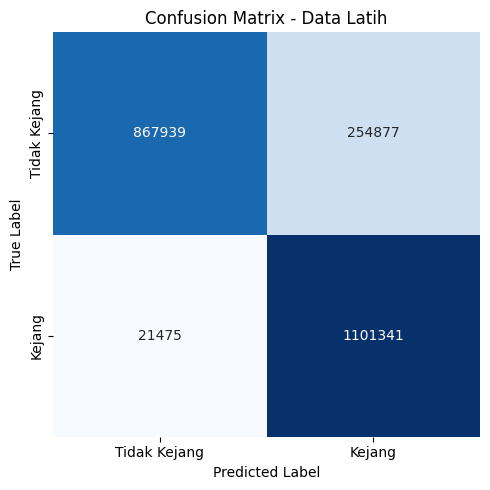

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9422    0.7582    0.8402    280704
tidak kejang     0.7977    0.9535    0.8687    280704

    accuracy                         0.8558    561408
   macro avg     0.8700    0.8558    0.8544    561408
weighted avg     0.8700    0.8558    0.8544    561408



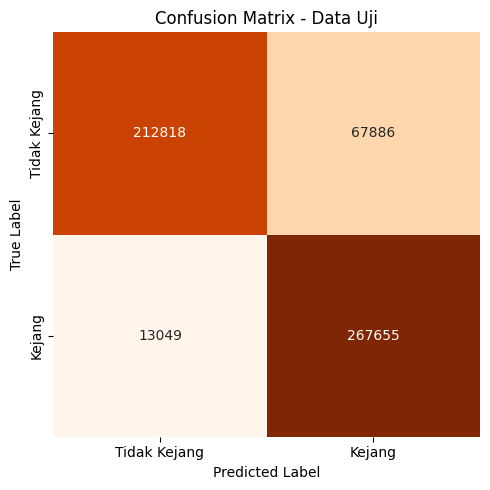

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# BLACKMAN SKEMA BARU (stratify)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.858402                1
{'max_depth': 10, 'n_estimators': 100}         0.779077                2
 {'max_depth': 5, 'n_estimators': 100}         0.687534                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9795    0.7868    0.8727   1122816
tidak kejang     0.8219    0.9836    0.8955   1122816

    accuracy                         0.8852   2245632
   macro avg     0.9007    0.8852    0.8841   2245632
weighted avg     0.9007    0.8852    0.8841   2245632



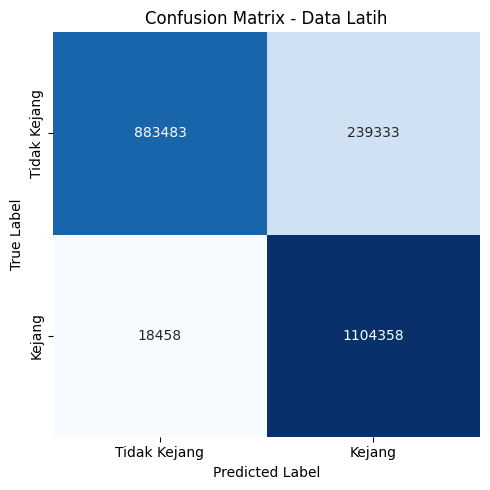

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9413    0.7688    0.8463    280704
tidak kejang     0.8046    0.9520    0.8721    280704

    accuracy                         0.8604    561408
   macro avg     0.8729    0.8604    0.8592    561408
weighted avg     0.8729    0.8604    0.8592    561408



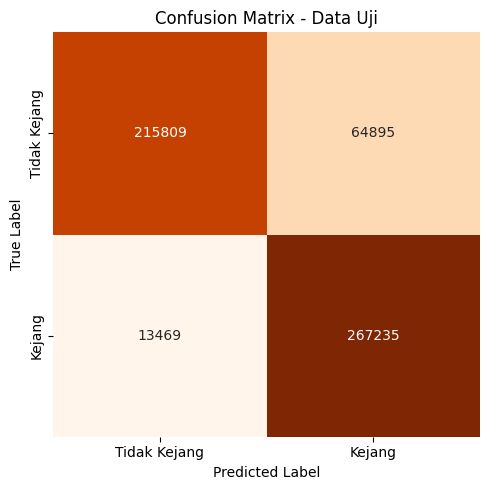

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# HAMMING SKEMA BARU (stratified)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.865585                1
{'max_depth': 10, 'n_estimators': 100}         0.786017                2
 {'max_depth': 5, 'n_estimators': 100}         0.677233                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9748    0.8100    0.8848   1122816
tidak kejang     0.8374    0.9790    0.9027   1122816

    accuracy                         0.8945   2245632
   macro avg     0.9061    0.8945    0.8937   2245632
weighted avg     0.9061    0.8945    0.8937   2245632



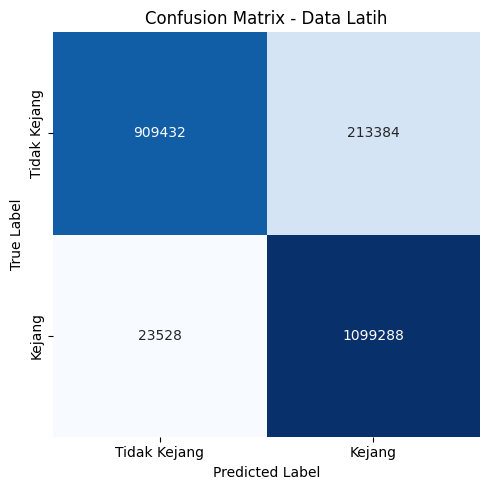

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9350    0.7895    0.8561    280704
tidak kejang     0.8179    0.9451    0.8769    280704

    accuracy                         0.8673    561408
   macro avg     0.8764    0.8673    0.8665    561408
weighted avg     0.8764    0.8673    0.8665    561408



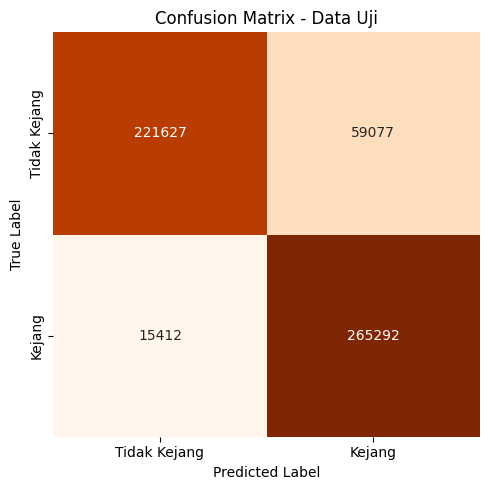

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# hanning (scema baru) stratify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.868257                1
{'max_depth': 10, 'n_estimators': 100}         0.798255                2
 {'max_depth': 5, 'n_estimators': 100}         0.658602                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9761    0.8146    0.8881   1122816
tidak kejang     0.8409    0.9801    0.9052   1122816

    accuracy                         0.8973   2245632
   macro avg     0.9085    0.8973    0.8966   2245632
weighted avg     0.9085    0.8973    0.8966   2245632



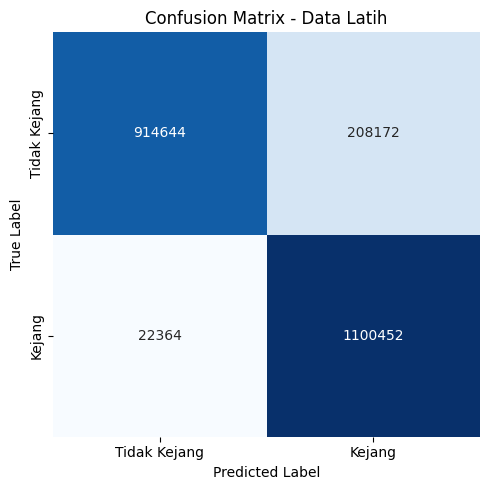

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9344    0.7920    0.8573    280704
tidak kejang     0.8195    0.9444    0.8775    280704

    accuracy                         0.8682    561408
   macro avg     0.8769    0.8682    0.8674    561408
weighted avg     0.8769    0.8682    0.8674    561408



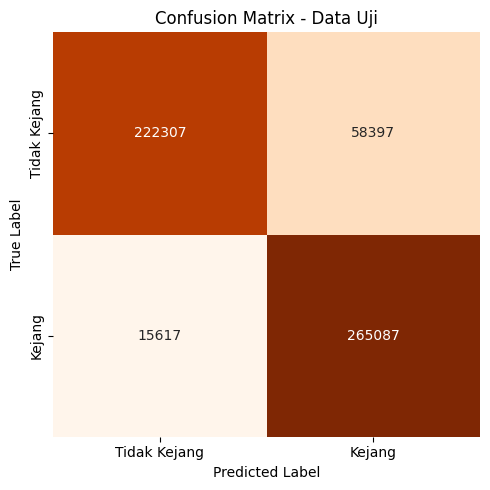

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (skema baru) stratify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9721    0.8005    0.8780   1122816
tidak kejang     0.8305    0.9771    0.8978   1122816

    accuracy                         0.8888   2245632
   macro avg     0.9013    0.8888    0.8879   2245632
weighted avg     0.9013    0.8888    0.8879   2245632



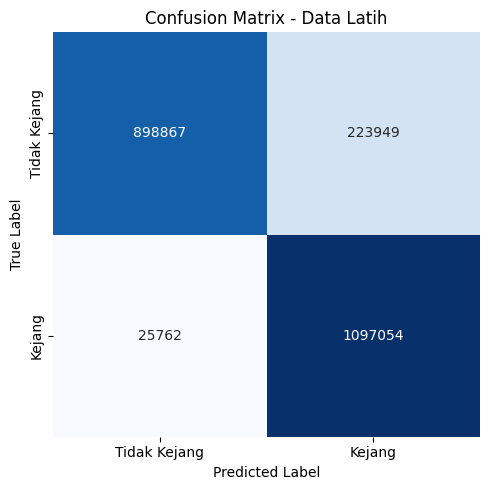

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9278    0.7748    0.8444    280704
tidak kejang     0.8067    0.9397    0.8681    280704

    accuracy                         0.8573    561408
   macro avg     0.8673    0.8573    0.8563    561408
weighted avg     0.8673    0.8573    0.8563    561408



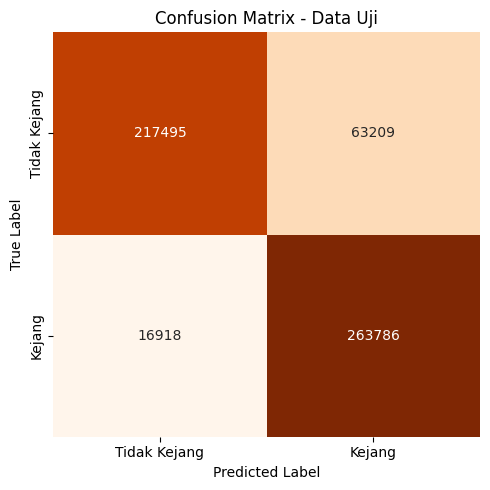

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.857068                1
{'max_depth': 10, 'n_estimators': 100}         0.766282                2
 {'max_depth': 5, 'n_estimators': 100}         0.663299                3


# hanning (scema baru)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG (1).csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.868166                1
{'max_depth': 10, 'n_estimators': 100}         0.797909                2
 {'max_depth': 5, 'n_estimators': 100}         0.658586                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9738    0.8165    0.8883   1122680
tidak kejang     0.8421    0.9780    0.9050   1122952

    accuracy                         0.8973   2245632
   macro avg     0.9079    0.8973    0.8966   2245632
weighted avg     0.9079    0.8973    0.8966   2245632



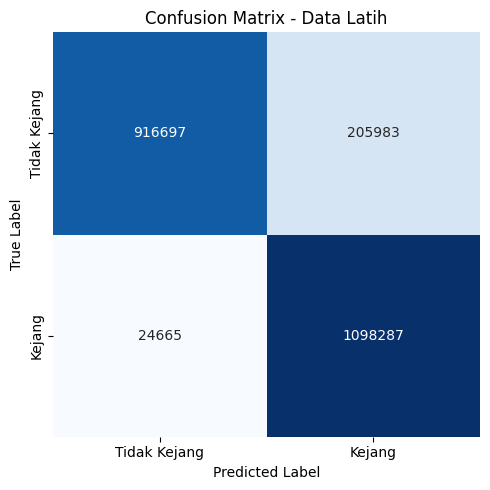

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9313    0.7945    0.8575    280840
tidak kejang     0.8207    0.9413    0.8769    280568

    accuracy                         0.8679    561408
   macro avg     0.8760    0.8679    0.8672    561408
weighted avg     0.8760    0.8679    0.8672    561408



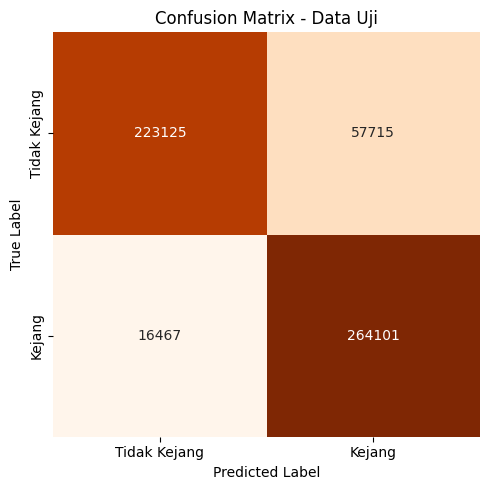

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (skema baru)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9708    0.8041    0.8796   1122680
tidak kejang     0.8329    0.9758    0.8987   1122952

    accuracy                         0.8900   2245632
   macro avg     0.9018    0.8900    0.8892   2245632
weighted avg     0.9018    0.8900    0.8892   2245632



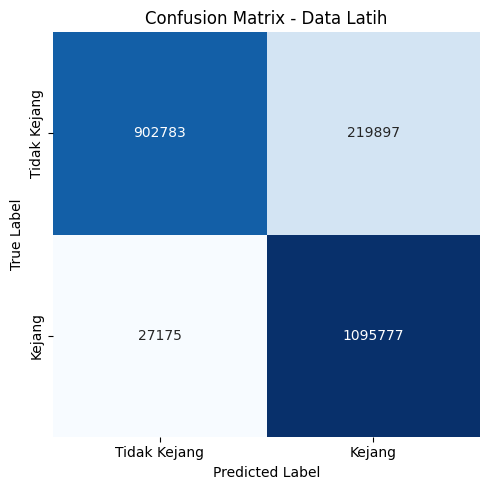

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9254    0.7771    0.8448    280840
tidak kejang     0.8077    0.9373    0.8677    280568

    accuracy                         0.8572    561408
   macro avg     0.8666    0.8572    0.8562    561408
weighted avg     0.8666    0.8572    0.8562    561408



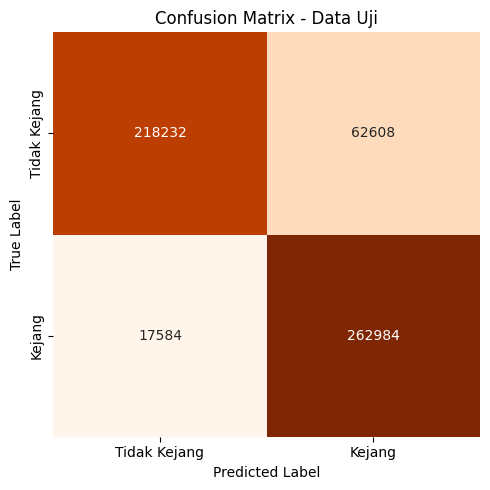

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.856795                1
{'max_depth': 10, 'n_estimators': 100}         0.768817                2
 {'max_depth': 5, 'n_estimators': 100}         0.663863                3


# HAMMING SKEMA BARU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.865174                1
{'max_depth': 10, 'n_estimators': 100}         0.784831                2
 {'max_depth': 5, 'n_estimators': 100}         0.675978                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9737    0.8076    0.8829   1122680
tidak kejang     0.8357    0.9782    0.9014   1122952

    accuracy                         0.8929   2245632
   macro avg     0.9047    0.8929    0.8921   2245632
weighted avg     0.9047    0.8929    0.8921   2245632



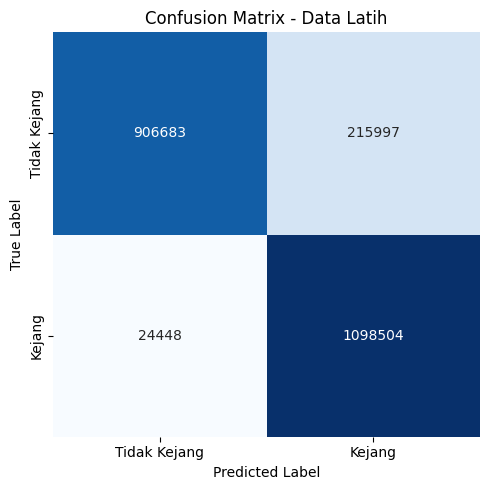

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9329    0.7868    0.8536    280840
tidak kejang     0.8155    0.9433    0.8748    280568

    accuracy                         0.8650    561408
   macro avg     0.8742    0.8651    0.8642    561408
weighted avg     0.8742    0.8650    0.8642    561408



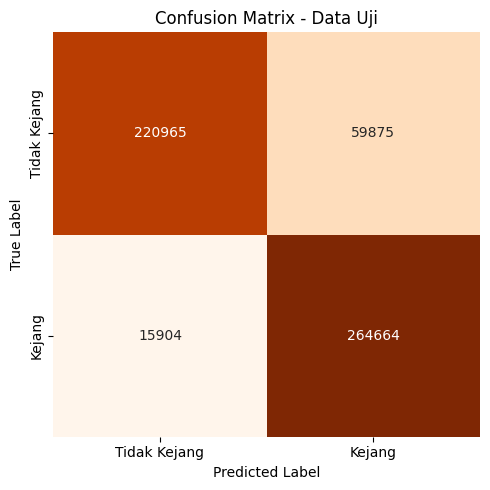

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# BLACKMAN SKEMA BARU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.859423                1
{'max_depth': 10, 'n_estimators': 100}         0.777335                2
 {'max_depth': 5, 'n_estimators': 100}         0.688503                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9790    0.7885    0.8735   1122680
tidak kejang     0.8230    0.9831    0.8959   1122952

    accuracy                         0.8858   2245632
   macro avg     0.9010    0.8858    0.8847   2245632
weighted avg     0.9010    0.8858    0.8847   2245632



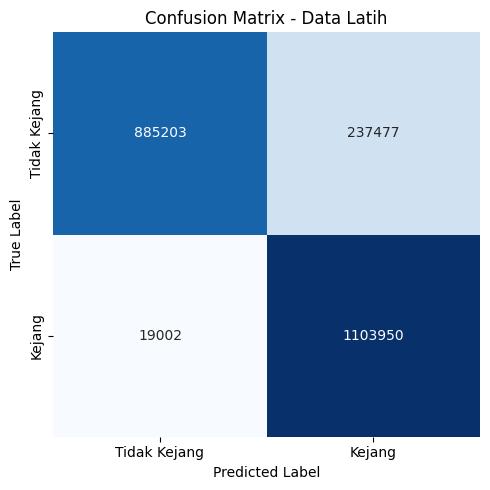

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9403    0.7699    0.8466    280840
tidak kejang     0.8050    0.9511    0.8720    280568

    accuracy                         0.8604    561408
   macro avg     0.8727    0.8605    0.8593    561408
weighted avg     0.8727    0.8604    0.8593    561408



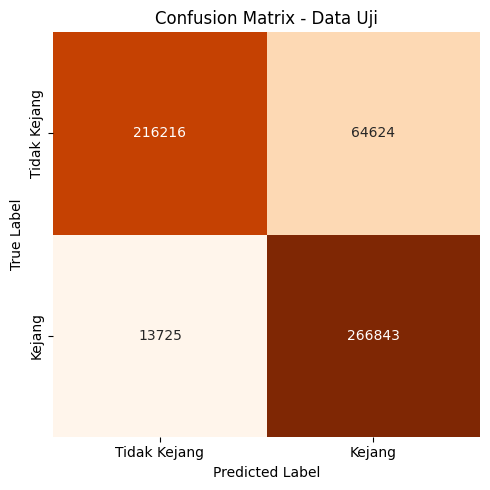

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# hanning (scema baru)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG (1).csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20, 30],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': 30, 'n_estimators': 100}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 30, 'n_estimators': 100}         0.880718                1
{'max_depth': 20, 'n_estimators': 100}         0.868166                2
{'max_depth': 10, 'n_estimators': 100}         0.797909                3


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9970    0.9180    0.9559   1122680
tidak kejang     0.9240    0.9972    0.9592   1122952

    accuracy                         0.9576   2245632
   macro avg     0.9605    0.9576    0.9575   2245632
weighted avg     0.9605    0.9576    0.9575   2245632



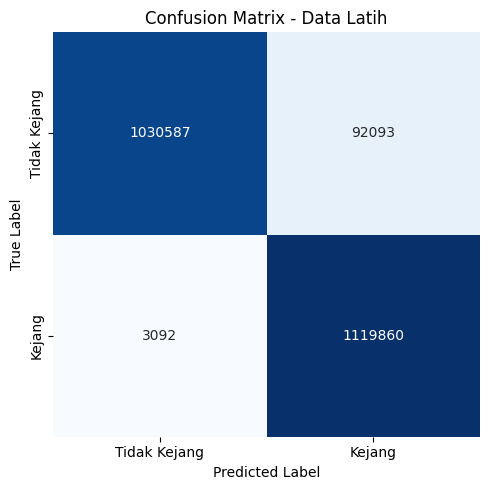

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9182    0.8397    0.8772    280840
tidak kejang     0.8522    0.9251    0.8872    280568

    accuracy                         0.8824    561408
   macro avg     0.8852    0.8824    0.8822    561408
weighted avg     0.8852    0.8824    0.8822    561408



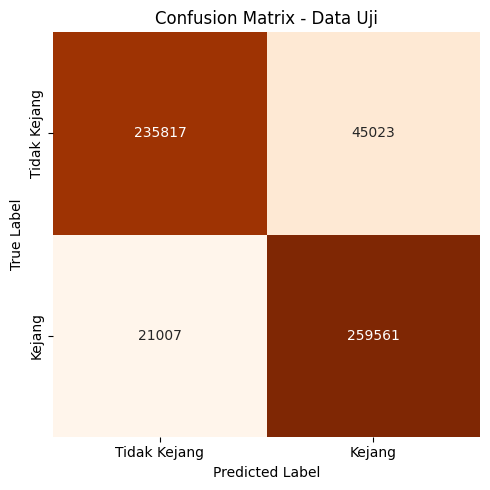

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# blackman (200, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 200}          0.85911                1


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9800    0.7867    0.8728   1122680
tidak kejang     0.8219    0.9839    0.8956   1122952

    accuracy                         0.8853   2245632
   macro avg     0.9009    0.8853    0.8842   2245632
weighted avg     0.9009    0.8853    0.8842   2245632



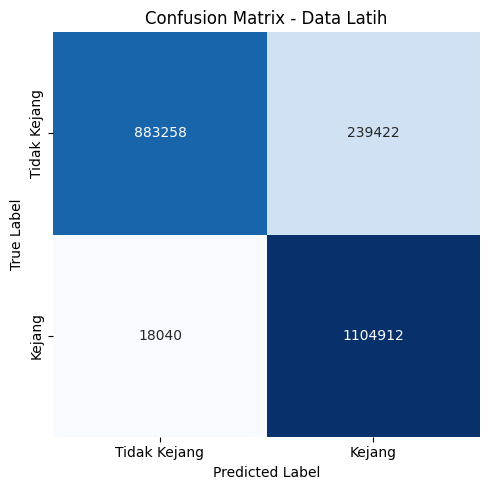

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9411    0.7686    0.8462    280840
tidak kejang     0.8043    0.9518    0.8719    280568

    accuracy                         0.8602    561408
   macro avg     0.8727    0.8602    0.8590    561408
weighted avg     0.8727    0.8602    0.8590    561408



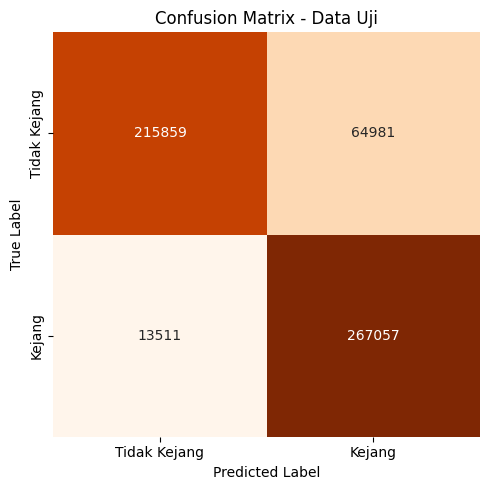

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (100, 20) BLM DIRUNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9708    0.8041    0.8796   1122680
tidak kejang     0.8329    0.9758    0.8987   1122952

    accuracy                         0.8900   2245632
   macro avg     0.9018    0.8900    0.8892   2245632
weighted avg     0.9018    0.8900    0.8892   2245632



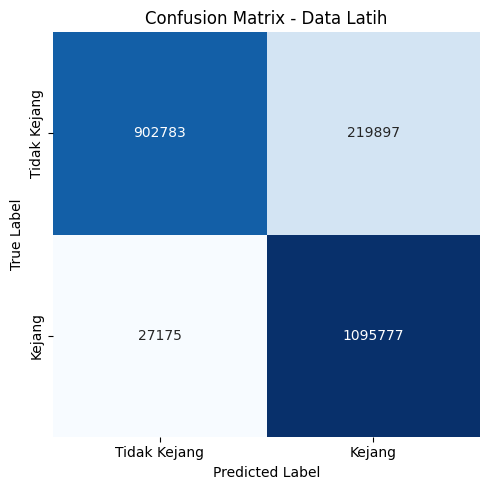

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9254    0.7771    0.8448    280840
tidak kejang     0.8077    0.9373    0.8677    280568

    accuracy                         0.8572    561408
   macro avg     0.8666    0.8572    0.8562    561408
weighted avg     0.8666    0.8572    0.8562    561408



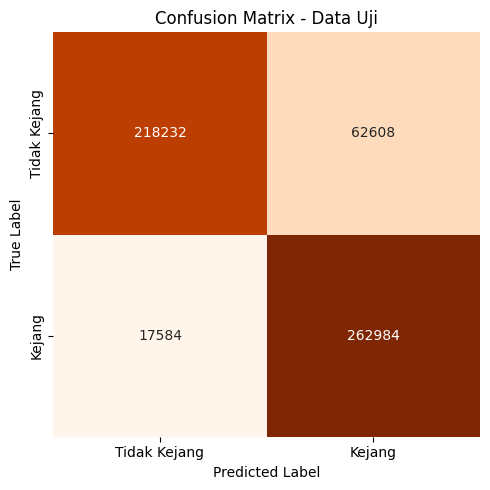

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# hamming (50, 10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                               params  mean_test_score  rank_test_score
{'max_depth': 10, 'n_estimators': 50}         0.783941                1


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9217    0.6267    0.7461   1122680
tidak kejang     0.7172    0.9467    0.8162   1122952

    accuracy                         0.7867   2245632
   macro avg     0.8195    0.7867    0.7811   2245632
weighted avg     0.8194    0.7867    0.7811   2245632



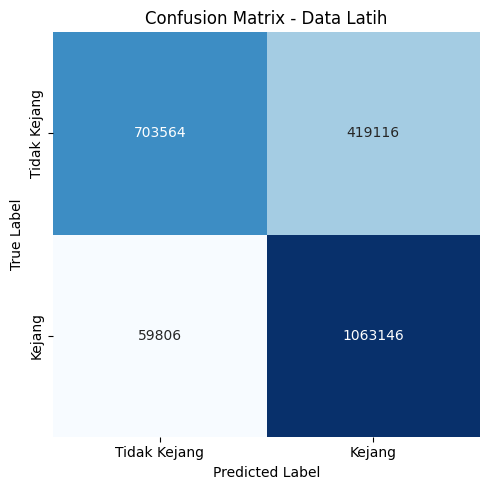

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9197    0.6263    0.7452    280840
tidak kejang     0.7165    0.9453    0.8151    280568

    accuracy                         0.7857    561408
   macro avg     0.8181    0.7858    0.7801    561408
weighted avg     0.8181    0.7857    0.7801    561408



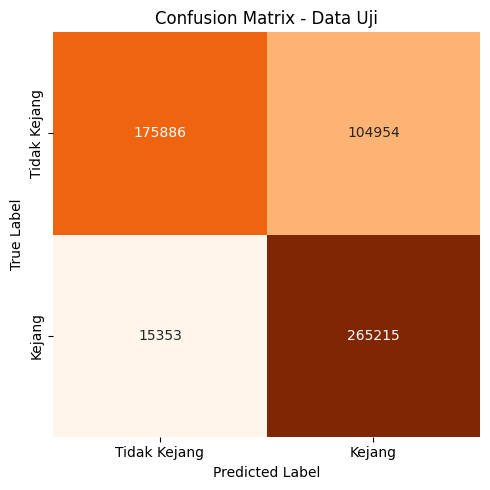

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# hanning (50, 10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG (1).csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}


In [ ]:

# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False)

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                               params  mean_test_score  rank_test_score
{'max_depth': 10, 'n_estimators': 50}         0.800578                1


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9226    0.6719    0.7775   1122680
tidak kejang     0.7420    0.9436    0.8308   1122952

    accuracy                         0.8078   2245632
   macro avg     0.8323    0.8077    0.8041   2245632
weighted avg     0.8323    0.8078    0.8041   2245632



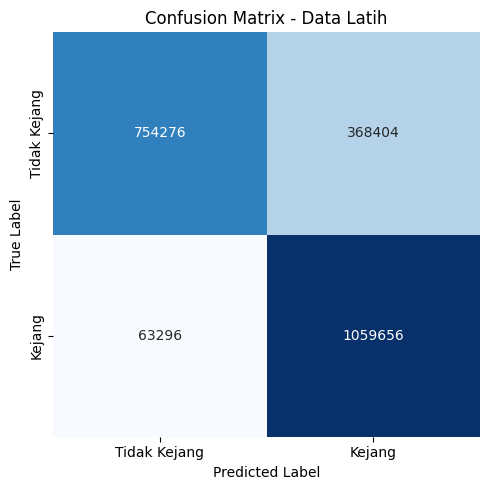

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9206    0.6700    0.7755    280840
tidak kejang     0.7404    0.9421    0.8292    280568

    accuracy                         0.8060    561408
   macro avg     0.8305    0.8061    0.8024    561408
weighted avg     0.8305    0.8060    0.8023    561408



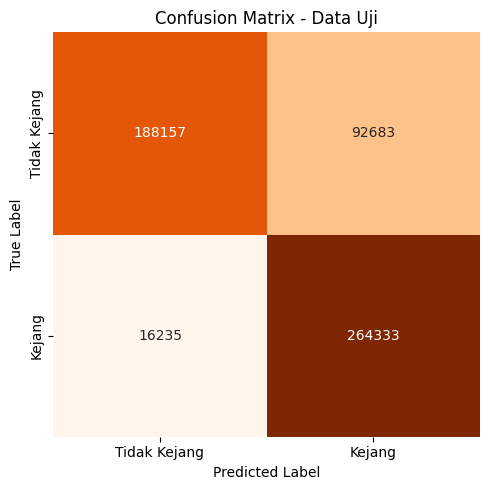

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID BLACKMAN FFT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9215    0.6112    0.7349   1122680
tidak kejang     0.7092    0.9480    0.8114   1122952

    accuracy                         0.7796   2245632
   macro avg     0.8154    0.7796    0.7731   2245632
weighted avg     0.8153    0.7796    0.7732   2245632



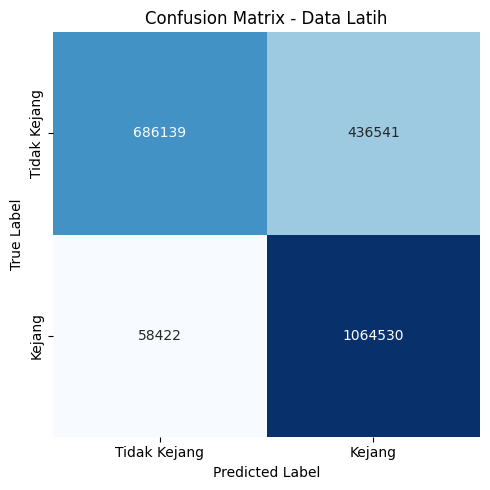

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9197    0.6096    0.7332    280840
tidak kejang     0.7078    0.9467    0.8100    280568

    accuracy                         0.7781    561408
   macro avg     0.8138    0.7782    0.7716    561408
weighted avg     0.8138    0.7781    0.7716    561408



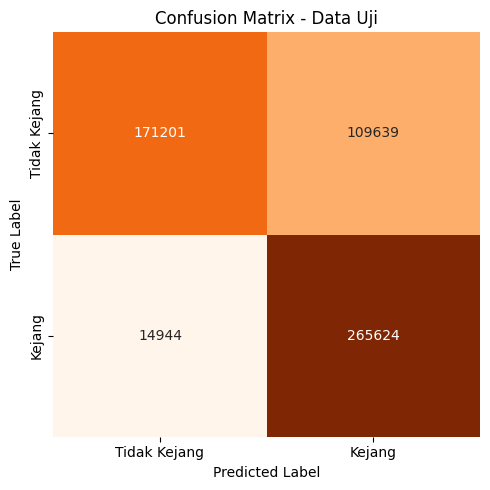

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID BLACKMAN FFT (100, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9790    0.7885    0.8735   1122680
tidak kejang     0.8230    0.9831    0.8959   1122952

    accuracy                         0.8858   2245632
   macro avg     0.9010    0.8858    0.8847   2245632
weighted avg     0.9010    0.8858    0.8847   2245632



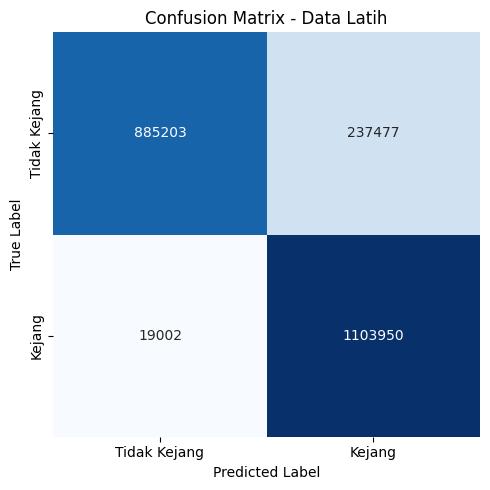

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9403    0.7699    0.8466    280840
tidak kejang     0.8050    0.9511    0.8720    280568

    accuracy                         0.8604    561408
   macro avg     0.8727    0.8605    0.8593    561408
weighted avg     0.8727    0.8604    0.8593    561408



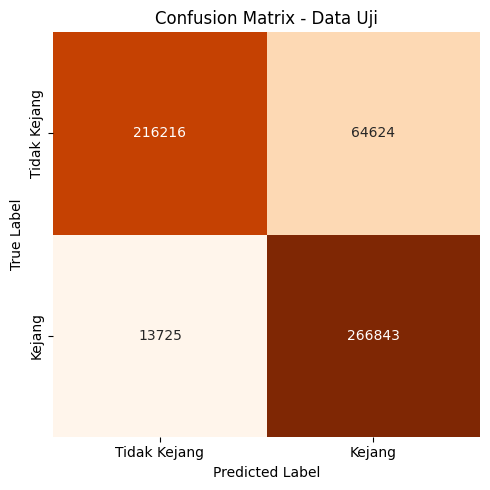

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID HAMMING FFT (200, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9754    0.8072    0.8834   1122680
tidak kejang     0.8356    0.9796    0.9019   1122952

    accuracy                         0.8934   2245632
   macro avg     0.9055    0.8934    0.8926   2245632
weighted avg     0.9055    0.8934    0.8926   2245632



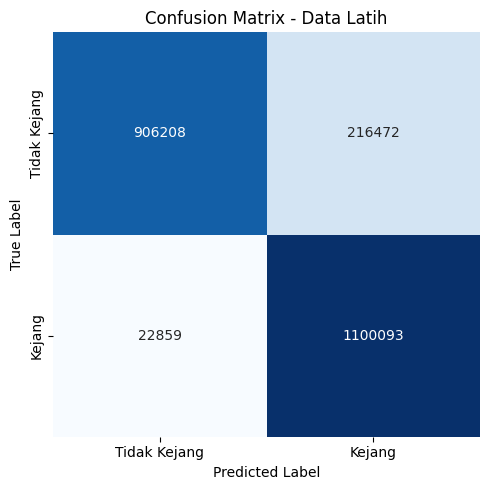

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9346    0.7867    0.8543    280840
tidak kejang     0.8157    0.9449    0.8756    280568

    accuracy                         0.8658    561408
   macro avg     0.8752    0.8658    0.8649    561408
weighted avg     0.8752    0.8658    0.8649    561408



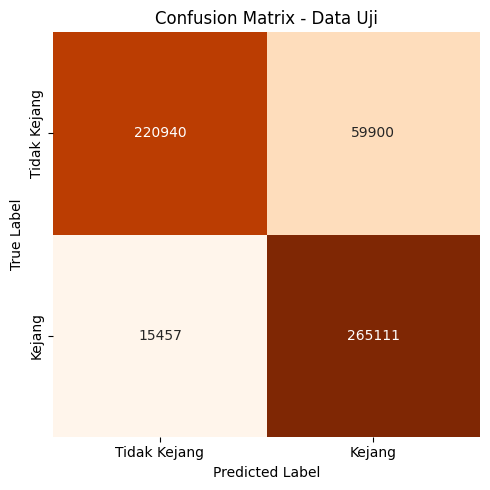

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (200, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9722    0.8066    0.8817   1122680
tidak kejang     0.8348    0.9770    0.9003   1122952

    accuracy                         0.8918   2245632
   macro avg     0.9035    0.8918    0.8910   2245632
weighted avg     0.9035    0.8918    0.8910   2245632



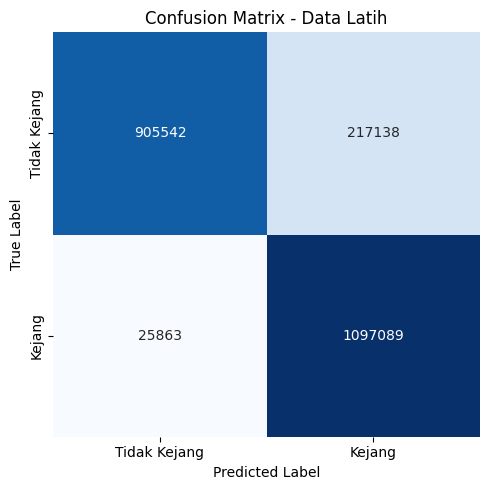

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9260    0.7788    0.8460    280840
tidak kejang     0.8090    0.9377    0.8686    280568

    accuracy                         0.8582    561408
   macro avg     0.8675    0.8582    0.8573    561408
weighted avg     0.8675    0.8582    0.8573    561408



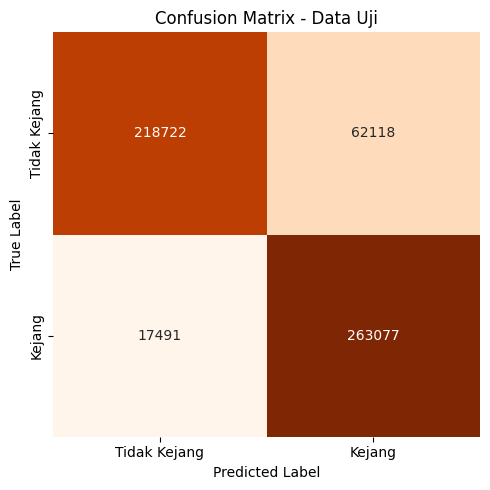

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID HANNING FFT (200, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9744    0.8163    0.8884   1122680
tidak kejang     0.8420    0.9786    0.9052   1122952

    accuracy                         0.8975   2245632
   macro avg     0.9082    0.8975    0.8968   2245632
weighted avg     0.9082    0.8975    0.8968   2245632



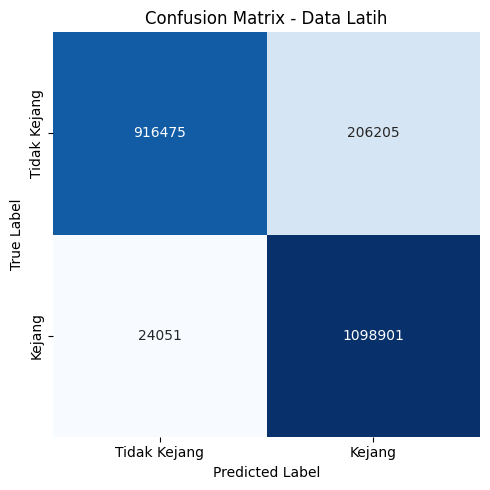

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9319    0.7945    0.8577    280840
tidak kejang     0.8208    0.9419    0.8772    280568

    accuracy                         0.8682    561408
   macro avg     0.8763    0.8682    0.8675    561408
weighted avg     0.8764    0.8682    0.8674    561408



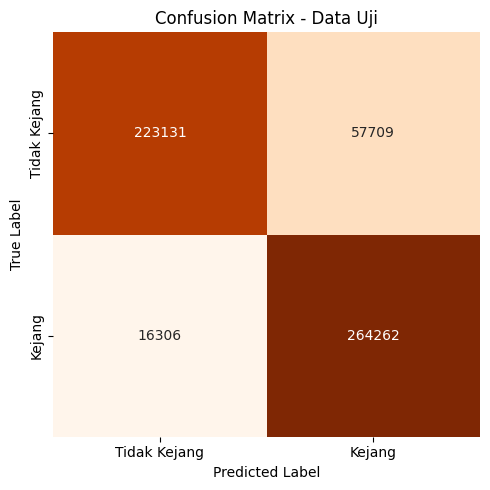

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID HANNING FFT (100, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 100],
    'max_depth': [10, 20]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9738    0.8165    0.8883   1122680
tidak kejang     0.8421    0.9780    0.9050   1122952

    accuracy                         0.8973   2245632
   macro avg     0.9079    0.8973    0.8966   2245632
weighted avg     0.9079    0.8973    0.8966   2245632



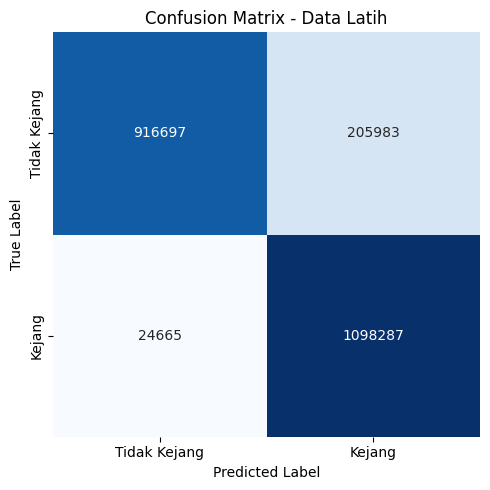

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9313    0.7945    0.8575    280840
tidak kejang     0.8207    0.9413    0.8769    280568

    accuracy                         0.8679    561408
   macro avg     0.8760    0.8679    0.8672    561408
weighted avg     0.8760    0.8679    0.8672    561408



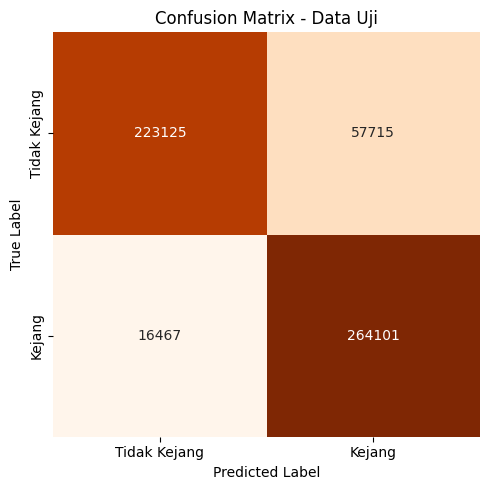

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID HAMMING FFT (100, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9737    0.8076    0.8829   1122680
tidak kejang     0.8357    0.9782    0.9014   1122952

    accuracy                         0.8929   2245632
   macro avg     0.9047    0.8929    0.8921   2245632
weighted avg     0.9047    0.8929    0.8921   2245632



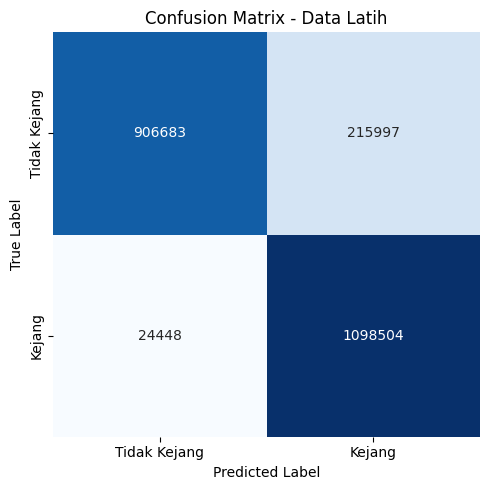

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9329    0.7868    0.8536    280840
tidak kejang     0.8155    0.9433    0.8748    280568

    accuracy                         0.8650    561408
   macro avg     0.8742    0.8651    0.8642    561408
weighted avg     0.8742    0.8650    0.8642    561408



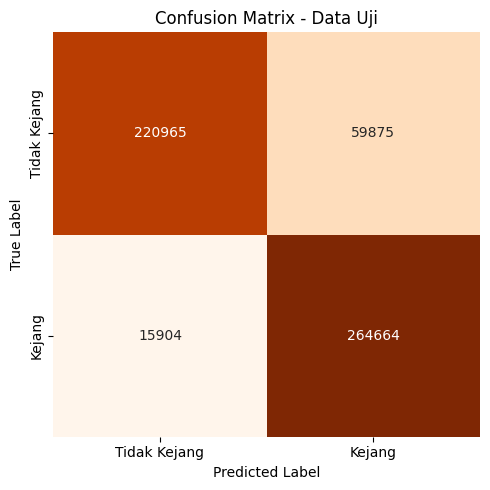

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID BLACKMAN FFT (200, 20) BLM DIRUNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9800    0.7867    0.8728   1122680
tidak kejang     0.8219    0.9839    0.8956   1122952

    accuracy                         0.8853   2245632
   macro avg     0.9009    0.8853    0.8842   2245632
weighted avg     0.9009    0.8853    0.8842   2245632



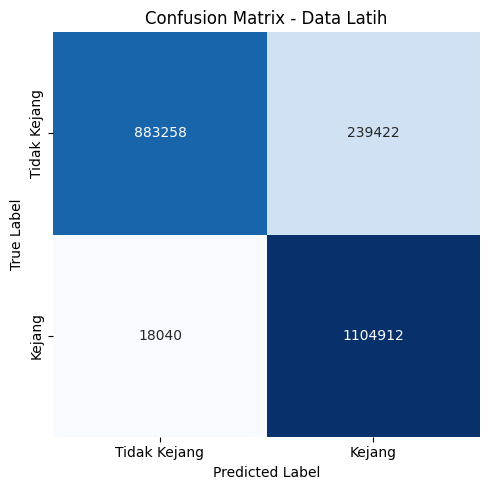

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9411    0.7686    0.8462    280840
tidak kejang     0.8043    0.9518    0.8719    280568

    accuracy                         0.8602    561408
   macro avg     0.8727    0.8602    0.8590    561408
weighted avg     0.8727    0.8602    0.8590    561408



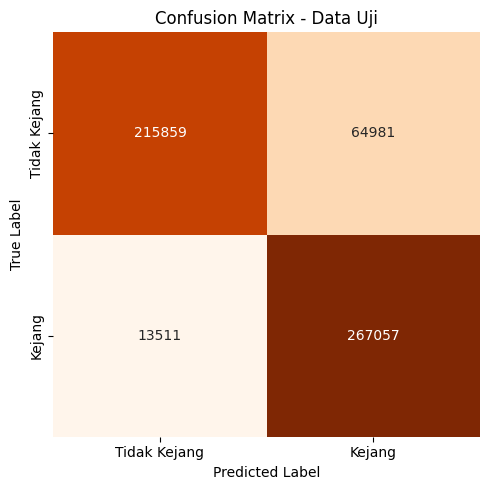

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (100, 20) BLM DIRUNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9708    0.8041    0.8796   1122680
tidak kejang     0.8329    0.9758    0.8987   1122952

    accuracy                         0.8900   2245632
   macro avg     0.9018    0.8900    0.8892   2245632
weighted avg     0.9018    0.8900    0.8892   2245632



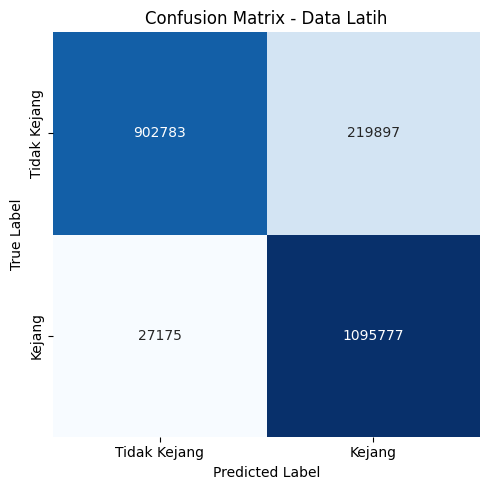

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID BLACKMAN FFT (200, 20) BLM DIRUNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


KeyboardInterrupt: 

In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()